In [1]:
import sys
import os
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import tempfile
from pathlib import Path
from slicker import SLICKER
welcome_msg="Welcome to SLICKER"

In [2]:
#read in inputs from netcdf into arrays, noting the proxies have missing data
input_path=Path('../Python_examples')
output_path='../Python_examples_output'
testid='test5'
inputsname=os.path.join(input_path,'test5_inputs.nc')
nproxy=2



inputs=Dataset(inputsname,'r')
timebase_in=inputs.variables['timebase'][:]
target_in=np.column_stack((timebase_in,inputs.variables['target'][:]))


#read in the proxies
proxies_in=[]
for n in range(1,nproxy+1):
    proxytmp=np.column_stack((timebase_in,inputs.variables['proxy{}'.format(n)][:]))
    proxytmp=proxytmp[~np.isnan(proxytmp).any(axis=1)]
    proxies_in.append(proxytmp)

inputs.close()


In [3]:
#Now lets set up the other parameters for the reconstruction

In [4]:
#initialise the SLICKER engine class with our reconstruction parameters and input
reco_engine=SLICKER.Slicker(prefix=testid,output_path=output_path,nmembers=1000,linear=False,timebase=timebase_in,proxies=proxies_in,target=target_in)
# this call prepares the input test files that the underlying
reco_engine.prepare_inputs()
reco_engine.run(testid)

#return output as a pandas Dataframe, there is also the option to return as a numpy array
output=reco_engine.parse_output(fmt='pd')


/home/robertsj/mytex/papers/in_prep/slicker/github/wrappers_and_examples/Python/../Python_examples_output
test5
['/home/robertsj/mytex/papers/in_prep/slicker/github/wrappers_and_examples/Python/../reconstruct']
 Enter filename for calibration target data series
 Enter number of proxy_orig data series
 Enter filename for proxy_orig data series            1  <optional max time for sign checking of this proxy>
 Enter filename for proxy_orig data series            2  <optional max time for sign checking of this proxy>
 Enter filename for time base of reconstruction
 Enter number of ensemble members (default 4096)
 Enter value for SLACK width parameter (h) (default 0.4,1.6)
 Enter maximum CPU time per ensemble member
 Enter solution tolerance
 Enter filename for output
 Attempt non-linear reconstruction (y/n)?
 Enter percentile for stationarity optimisatipn (0.5 default)
 check for proxy inversion (y/n)?
        proxy    correlation    hc
           2  0.91795831512884041       0.400000006 

[[ 1.00000000e+00  2.35162511e-01  2.68716551e-03  2.90280115e-02]
 [ 2.00000000e+00  4.46954370e-01  1.46031729e-03  1.49904797e-02]
 [ 3.00000000e+00  6.30928159e-01  9.03911307e-04  9.86721087e-03]
 [ 4.00000000e+00  7.81260312e-01  7.26989645e-04  8.24699178e-03]
 [ 5.00000000e+00  8.80246580e-01  9.60099569e-04  9.57607944e-03]
 [ 6.00000000e+00  9.30980742e-01  8.36699852e-04  8.94413143e-03]
 [ 7.00000000e+00  9.31722283e-01  8.44169524e-04  9.28218663e-03]
 [ 8.00000000e+00  9.02555108e-01  8.99608829e-04  9.60276090e-03]
 [ 9.00000000e+00  8.35432351e-01  8.11383070e-04  9.19280946e-03]
 [ 1.00000000e+01  7.65367985e-01  8.10354308e-04  9.02562216e-03]
 [ 1.10000000e+01  6.92544878e-01  8.22747592e-04  8.87433905e-03]
 [ 1.20000000e+01  6.31944954e-01  7.66058394e-04  8.42627138e-03]
 [ 1.30000000e+01  5.86031258e-01  7.21172895e-04  7.81614240e-03]
 [ 1.40000000e+01  5.87979436e-01  7.72563275e-04  8.35016929e-03]
 [ 1.50000000e+01  6.14436388e-01  8.39567336e-04  9.33725853e

/usr/lib/python3.11/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


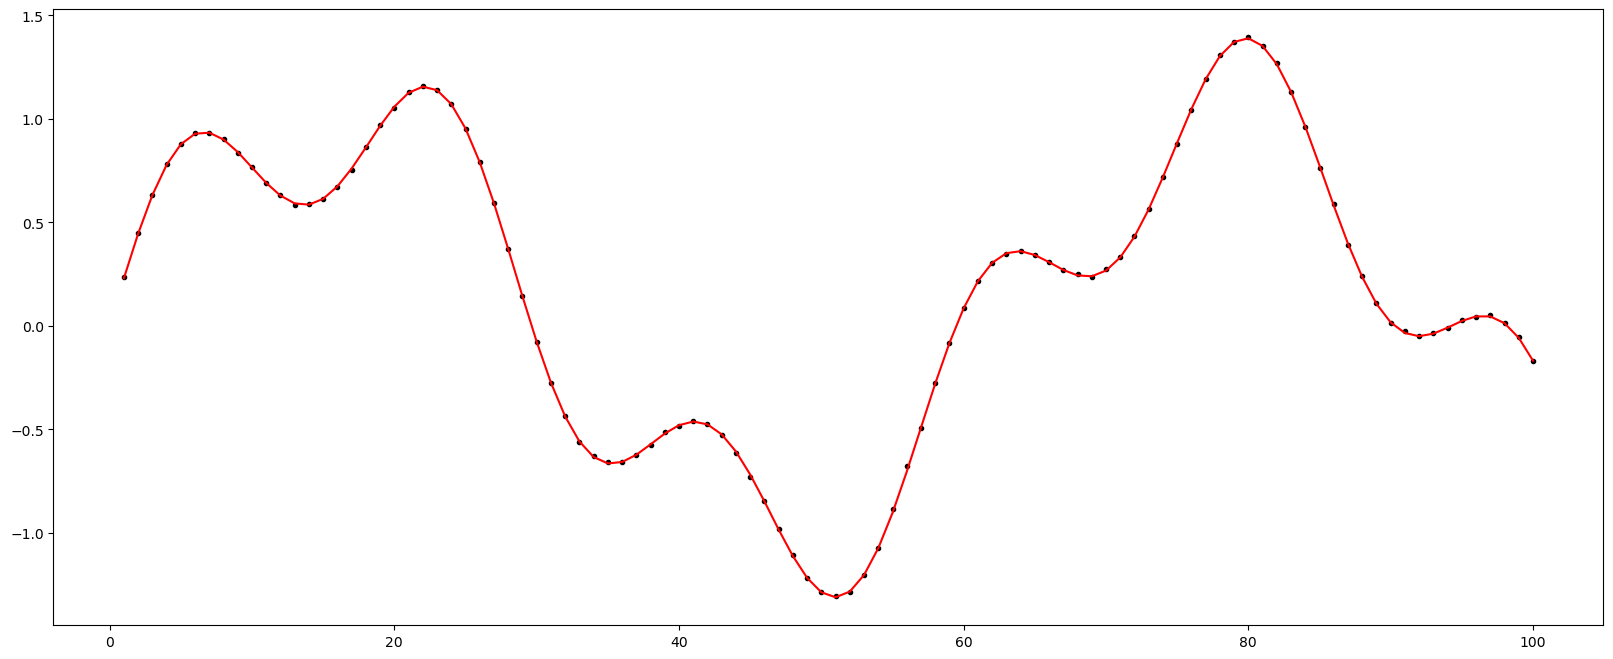

In [5]:
# now lets plot the results
output=reco_engine.parse_output()
print(output)
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,figsize=[20,8])
#ax.plot(target_in[:,0],target_in[:,1])

#95% confidence interval
cimin=output[:,1]-output[:,2]
cimax=output[:,1]+output[:,2]

ax.plot(output[:,0],output[:,1],'k.')
ax.plot(target_in[:,0],target_in[:,1],'r')
ax.fill_between(output[:,0],cimin,cimax,alpha=0.5)
